# Neural Prophet
Fusing traditional time series algorithms using standard deep learning methods, built on PyTorch, inspired by Facebook Prophet and AR-Net.

In [1]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

### Fund volume in RUB

In [2]:
df = pd.read_excel('../data_excel/20250301.xlsx', header=2)

df = df[:25] # delete footnotes
df.drop(columns=['№ п/п', 'Январь 2008*'], inplace=True)
df.drop(index=0, inplace=True)

# Melt the dataframe to long format
df_long = pd.melt(
    df,
    id_vars=["Показатель"],
    var_name="ds",
    value_name="y"
)

# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем на конец периода"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

NeuralProphet used the default parameter of 10 changepoints and fit them to our data.

In [3]:
m = NeuralProphet(
                  # Disable change trendpoints
                  # n_changepoints=0,
                  # Disable seasonality components
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                )
metrics = m.fit(prophet_data)
forecast = m.predict(prophet_data)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows with NaNs in 'y' column.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 190


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (13) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 12. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'e3d440e4-6e21-4978-bd38-90b210356832',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 12, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2025, 2, 1, 0, 0)], dtype=object),
              'y': array([ 1797.9492,  1817.4244,  1838.2428, ..., 12793.67  , 12811.252 ,
                          12828.834 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid

In [4]:
m.plot_parameters(components=["trend"])

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'c7dcbc31-2c9e-45f3-9f80-7e77eb833df7',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 12, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2025, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 1797.9492692 ,  1817.42447182,  1838.24279186, ..., 12793.67045552,
                          12811.25247995, 12828.83450437]),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hover

In [5]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(prophet_data, n_historic_predictions=True, periods=12)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '17cfe5c4-4f85-4380-9603-9af2d63c9292',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 12, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2026, 2, 1, 0, 0)], dtype=object),
              'y': array([ 1797.9492,  1817.4244,  1838.2428, ..., 13000.684 , 13018.266 ,
                          13035.848 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid

In [6]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a0228020-12fc-48d6-9f23-465b28d623a3',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 12, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2026, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 1797.9492,  1817.4244,  1838.2428, ..., 13000.684 , 13018.266 ,
                          13035.848 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermode

In [7]:
forecast.tail(12)

,ds,y,yhat1,trend
205,2025-03-01,NaN,12844.714844,12844.714844
206,2025-04-01,NaN,12862.296875,12862.296875
207,2025-05-01,NaN,12879.310547,12879.310547
208,2025-06-01,NaN,12896.894531,12896.894531
209,2025-07-01,NaN,12913.908203,12913.908203
210,2025-08-01,NaN,12931.490234,12931.490234
211,2025-09-01,NaN,12949.072266,12949.072266
212,2025-10-01,NaN,12966.087891,12966.087891
213,2025-11-01,NaN,12983.669922,12983.669922
214,2025-12-01,NaN,13000.683594,13000.683594


### Fund volume in USD

In [8]:
# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

In [9]:
m = NeuralProphet(
                  # Disable change trendpoints
                  # n_changepoints=0,
                  # Disable seasonality components
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                )
metrics = m.fit(prophet_data)
forecast = m.predict(prophet_data)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 190


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (13) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '5b56ed56-5efd-4595-9bc8-fac62da56c2b',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 12, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2025, 2, 1, 0, 0)], dtype=object),
              'y': array([ 27.169443,  31.194265,  35.496662, ..., 134.06764 , 132.94931 ,
                          131.83098 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid

In [10]:
m.plot_parameters(components=["trend"])

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'f5afb4d2-801a-4b9d-b7e7-eeabc7c44b2d',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 12, 1, 0, 0),
                          datetime.datetime(2025, 1, 1, 0, 0),
                          datetime.datetime(2025, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 27.16944277,  31.19426597,  35.49666317, ..., 134.06763269,
                          132.94930565, 131.83097861]),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermode': 'x un

In [11]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(prophet_data, n_historic_predictions=True, periods=12)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.512]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '9e03d50e-1542-485b-b5da-951b59cf948a',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 12, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2026, 2, 1, 0, 0)], dtype=object),
              'y': array([ 27.169443,  31.194265,  35.496662, ..., 120.900246, 119.7819  ,
                          118.66359 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid

In [12]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '49f824dd-025a-4b4c-8a33-cca64fc9dd64',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 12, 1, 0, 0),
                          datetime.datetime(2026, 1, 1, 0, 0),
                          datetime.datetime(2026, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 27.169443,  31.194265,  35.496662, ..., 120.900246, 119.7819  ,
                          118.66359 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermode

In [13]:
forecast.tail(12)

,ds,y,yhat1,trend
205,2025-03-01,NaN,130.820892,130.820892
206,2025-04-01,NaN,129.702545,129.702545
207,2025-05-01,NaN,128.620300,128.620300
208,2025-06-01,NaN,127.501976,127.501976
209,2025-07-01,NaN,126.419739,126.419739
210,2025-08-01,NaN,125.301392,125.301392
211,2025-09-01,NaN,124.183083,124.183083
212,2025-10-01,NaN,123.100807,123.100807
213,2025-11-01,NaN,121.982483,121.982483
214,2025-12-01,NaN,120.900246,120.900246


## Residuals (USD)

In [14]:
df=forecast[:203]

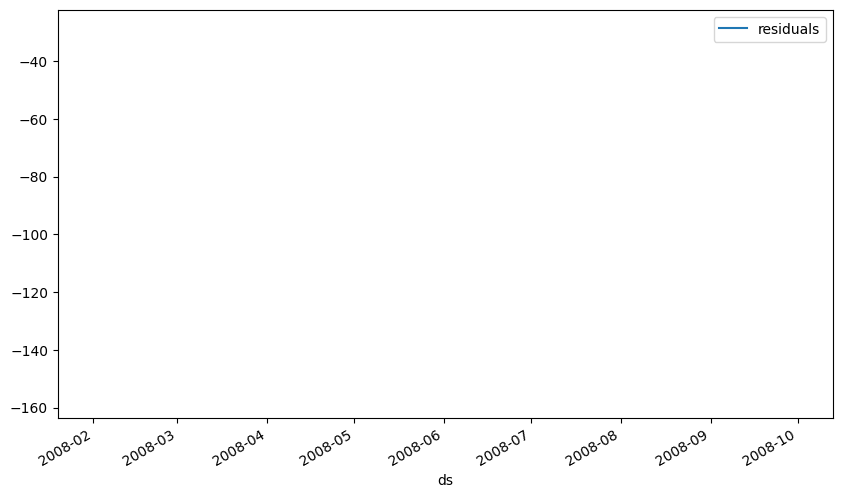

In [15]:
df_residuals = pd.DataFrame({"ds": prophet_data["ds"], "residuals": prophet_data["y"] - df["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))